In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
source_dir = "D:/School/IIT-PHD/Parametric results/Field Paper"

files = os.listdir(source_dir)
os.chdir(source_dir)

test_file = "D:/School/IIT-PHD/Parametric results/Field Paper/p4_AlbuquerqueNM_Base Elec_NV_BRHourlyHeat.csv"

heating_setpoint = 20
cooling_setpoint = 25


master_results = pd.DataFrame()
for file in files:
    if 'HourlyHeat' in str(file):
        file_name = str(file)

        outage_type = "Heating"


        climate = file_name.split('_')[1]
        case = file_name.split('_')[2]

        df = pd.read_csv(file)

        IDB = list(df['ZONE1:Zone Air Temperature [C](Hourly)'])
        ODB = list(df['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)'])

        IDB_DH_24 = []
        ODB_DH_24 = []

        for temp in range(24):
            IDB_DH_24.append(heating_setpoint - IDB[temp])
            ODB_DH_24.append(heating_setpoint - ODB[temp])
        ratio_24 = sum(IDB_DH_24)/sum(ODB_DH_24)

        IDB_DH_48 = []
        ODB_DH_48 = []

        for temp in range(48):
            IDB_DH_48.append(heating_setpoint - IDB[temp])
            ODB_DH_48.append(heating_setpoint - ODB[temp])
        ratio_48 = sum(IDB_DH_48)/sum(ODB_DH_48)

        IDB_DH_168 = []
        ODB_DH_168 = []

        for temp in range(168):
            IDB_DH_168.append(heating_setpoint - IDB[temp])
            ODB_DH_168.append(heating_setpoint - ODB[temp])
        ratio_168 = sum(IDB_DH_168)/sum(ODB_DH_168)

        new_row = pd.DataFrame({
            'Climate':[str(climate)],
            'Case':[str(case)],
            'Outage Type':[str(outage_type)],
            '24 hr Ratio':[ratio_24],
            '48 hr Ratio':[ratio_48],
            '168 hr Ratio':[ratio_168]
            })
        
        master_results = pd.concat([master_results,new_row], ignore_index=True)

    if 'HourlyCool' in str(file):
        file_name = str(file)

        outage_type = "Cooling"


        climate = file_name.split('_')[1]
        case = file_name.split('_')[2]

        df = pd.read_csv(file)

        IDB = list(df['ZONE1:Zone Air Temperature [C](Hourly)'])
        ODB = list(df['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)'])

        IDB_DH_24 = []
        ODB_DH_24 = []

        for temp in range(24):
            IDB_DH_24.append(cooling_setpoint - IDB[temp])
            ODB_DH_24.append(cooling_setpoint - ODB[temp])
        ratio_24 = sum(IDB_DH_24)/sum(ODB_DH_24)

        IDB_DH_48 = []
        ODB_DH_48 = []

        for temp in range(48):
            IDB_DH_48.append(cooling_setpoint - IDB[temp])
            ODB_DH_48.append(cooling_setpoint - ODB[temp])
        ratio_48 = sum(IDB_DH_48)/sum(ODB_DH_48)

        IDB_DH_168 = []
        ODB_DH_168 = []

        for temp in range(168):
            IDB_DH_168.append(cooling_setpoint - IDB[temp])
            ODB_DH_168.append(cooling_setpoint - ODB[temp])
        ratio_168 = sum(IDB_DH_168)/sum(ODB_DH_168)

        new_row = pd.DataFrame({
            'Climate':[str(climate)],
            'Case':[str(case)],
            'Outage Type':[str(outage_type)],
            '24 hr Ratio':[ratio_24],
            '48 hr Ratio':[ratio_48],
            '168 hr Ratio':[ratio_168]
            })
        
        master_results = pd.concat([master_results,new_row], ignore_index=True)
        

master_results.head()
# master_results.to_csv('master_results.csv')



{'ChicagoIL', 'ElPasoTX', 'AlbuquerqueNM', 'NashvilleTN', 'InternationalFallsMN', 'VancouverBC', 'GreatFallsMT', 'TampaFL'}
0.9854890667845505
0.9801674341308906
0.9618485955923188
nan
nan
nan
0.8132779306404357
0.8014047979410499
0.7473838287052006
0.7692832933941186
0.7527221006777491
0.7230224746269026
0.9850729737896055
0.9827977901646933
0.9709358940613362
0.6922032291913933
0.6826562362043951
0.6525342217391367
0.985338155640111
0.9807666388360587
0.9603090894783817
nan
nan
nan


c:\Users\amitc_crl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\amitc_crl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


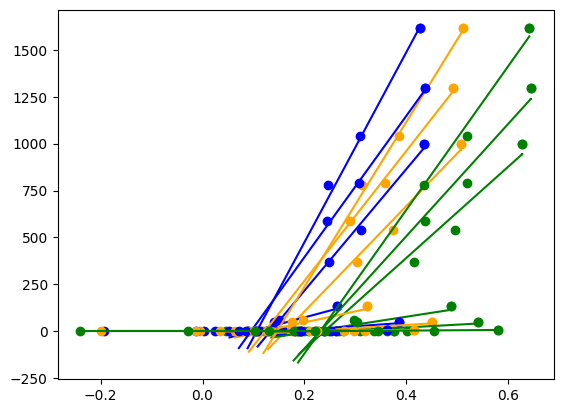

In [121]:
data_file = "D:/School/IIT-PHD/Parametric results/Field Paper/master_results.csv"

df = pd.read_csv(data_file)

climates = set(list(df['Climate']))

print(climates)



count = 0

for climate in climates:


    row = df[df['Climate'] == str(climate)]

    gr_24 = row['24 hr Ratio']
    gr_48 = row['48 hr Ratio']
    gr_168 = row['168 hr Ratio']
    set_hours = row['SET Hours']

    plt.plot(gr_24, set_hours, 'o', color='blue')
    m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
    plt.plot(gr_24, m_24*gr_24+b_24, color='blue')

    R = np.corrcoef(gr_24, set_hours)[0,1]
    R_Squared_24 = R*R

    plt.plot(gr_48, set_hours, 'o', color='orange')
    m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
    plt.plot(gr_48, m_48*gr_48+b_48, color='orange')

    R = np.corrcoef(gr_48, set_hours)[0,1]
    R_Squared_48 = R*R

    plt.plot(gr_168, set_hours, 'o', color='green')
    m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
    plt.plot(gr_168, m_168*gr_168+b_168, color='green')

    R = np.corrcoef(gr_168, set_hours)[0,1]
    R_Squared_168 = R*R

    print(R_Squared_24)
    print(R_Squared_48)
    print(R_Squared_168)


c:\Users\amitc_crl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\amitc_crl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_56148\3292739549.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  ratio_ep = round(((216 - b_24) / m_24), 3)
C:\Users\amitc_crl\AppData\Local\Temp\ipykernel_56148\3292739549.py:257: RuntimeWarning: divide by zero encountered in double_scalars
  ratio_tf = round(((216 - b_24) / m_24), 3)


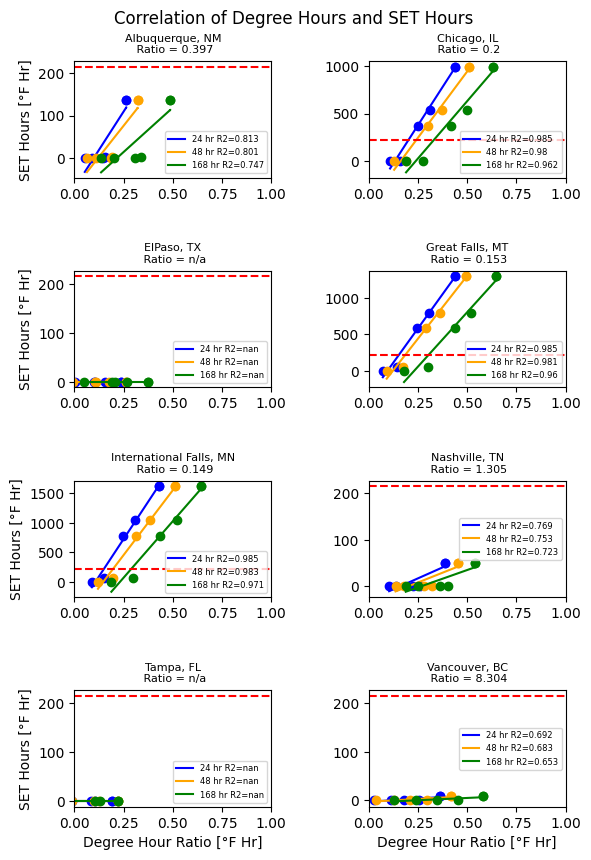

In [120]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(6.5, 9))

df = pd.read_csv(data_file)



# AlbuquerqueNM
row = df[df['Climate'] == 'AlbuquerqueNM']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[0,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[0,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_alb = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[0,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[0,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[0,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[0,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[0,0].axhline(y=216, color='r', linestyle='--')
axs[0,0].set_xlim(0, 1)
# axs[0,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[0,0].set_ylabel('SET Hours [°F Hr]')
axs[0,0].legend(loc='best', fontsize=6)
axs[0,0].set_title('Albuquerque, NM\n Ratio = ' + str(ratio_alb), fontsize=8)

# ChicagoIL

row = df[df['Climate'] == 'ChicagoIL']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[0,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[0,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_chi = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[0,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[0,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[0,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[0,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[0,1].axhline(y=216, color='r', linestyle='--')
axs[0,1].set_xlim(0, 1)
# axs[0,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[0,1].set_ylabel('SET Hours [°F Hr]')
axs[0,1].legend(loc='best', fontsize=6)
axs[0,1].set_title('Chicago, IL\n Ratio = ' + str(ratio_chi), fontsize=8)

# ElPasoTX

row = df[df['Climate'] == 'ElPasoTX']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[1,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[1,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_ep = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[1,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[1,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[1,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[1,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[1,0].axhline(y=216, color='r', linestyle='--')
axs[1,0].set_xlim(0, 1)
# axs[1,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[1,0].set_ylabel('SET Hours [°F Hr]')
axs[1,0].legend(loc='best', fontsize=6)
axs[1,0].set_title('ElPaso, TX\n Ratio = ' + str('n/a'), fontsize=8)


# GreatFallsMT

row = df[df['Climate'] == 'GreatFallsMT']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[1,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[1,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_gf = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[1,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[1,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[1,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[1,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[1,1].axhline(y=216, color='r', linestyle='--')
axs[1,1].set_xlim(0, 1)
# axs[1,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[1,1].set_ylabel('SET Hours [°F Hr]')
axs[1,1].legend(loc='best', fontsize=6)
axs[1,1].set_title('Great Falls, MT\n Ratio = ' + str(ratio_gf), fontsize=8)

# InternationalFallsMN

row = df[df['Climate'] == 'InternationalFallsMN']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[2,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[2,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_if = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[2,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[2,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[2,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[2,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[2,0].axhline(y=216, color='r', linestyle='--')
axs[2,0].set_xlim(0, 1)
# axs[2,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[2,0].set_ylabel('SET Hours [°F Hr]')
axs[2,0].legend(loc='best', fontsize=6)
axs[2,0].set_title('International Falls, MN\n Ratio = ' + str(ratio_if), fontsize=8)

# NashvilleTN

row = df[df['Climate'] == 'NashvilleTN']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[2,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[2,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_nash = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[2,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[2,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[2,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[2,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[2,1].axhline(y=216, color='r', linestyle='--')
axs[2,1].set_xlim(0, 1)
# axs[2,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[2,1].set_ylabel('SET Hours [°F Hr]')
axs[2,1].legend(loc='best', fontsize=6)
axs[2,1].set_title('Nashville, TN\n Ratio = ' + str(ratio_nash), fontsize=8)

# TampaFL

row = df[df['Climate'] == 'TampaFL']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[3,0].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[3,0].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_tf = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[3,0].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[3,0].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[3,0].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[3,0].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[3,0].axhline(y=216, color='r', linestyle='--')
axs[3,0].set_xlim(0, 1)
axs[3,0].set_xlabel('Degree Hour Ratio [°F Hr]')
axs[3,0].set_ylabel('SET Hours [°F Hr]')
axs[3,0].legend(loc='best', fontsize=6)
axs[3,0].set_title('Tampa, FL\n Ratio = ' + str('n/a'), fontsize=8)


# VancouverBC

row = df[df['Climate'] == 'VancouverBC']

gr_24 = row['24 hr Ratio']
gr_48 = row['48 hr Ratio']
gr_168 = row['168 hr Ratio']
set_hours = row['SET Hours']

R = np.corrcoef(gr_24, set_hours)[0,1]
R_Squared_24 = R*R

axs[3,1].plot(gr_24, set_hours, 'o', color='blue')
m_24, b_24 = np.polyfit(gr_24, set_hours, 1)
axs[3,1].plot(gr_24, m_24*gr_24+b_24, color='blue', label=('24 hr R2=' + str(round(R_Squared_24,3))))

ratio_van = round(((216 - b_24) / m_24), 3)

R = np.corrcoef(gr_48, set_hours)[0,1]
R_Squared_48 = R*R

axs[3,1].plot(gr_48, set_hours, 'o', color='orange')
m_48, b_48 = np.polyfit(gr_48, set_hours, 1)
axs[3,1].plot(gr_48, m_48*gr_48+b_48, color='orange', label=('48 hr R2=' + str(round(R_Squared_48,3))))

R = np.corrcoef(gr_168, set_hours)[0,1]
R_Squared_168 = R*R

axs[3,1].plot(gr_168, set_hours, 'o', color='green')
m_168, b_168 = np.polyfit(gr_168, set_hours, 1)
axs[3,1].plot(gr_168, m_168*gr_168+b_168, color='green', label=('168 hr R2=' + str(round(R_Squared_168,3))))

axs[3,1].axhline(y=216, color='r', linestyle='--')
axs[3,1].set_xlim(0, 1)
axs[3,1].set_xlabel('Degree Hour Ratio [°F Hr]')
# axs[3,1].set_ylabel('SET Hours [°F Hr]')
axs[3,1].legend(loc='best', fontsize=6)
axs[3,1].set_title('Vancouver, BC\n Ratio = ' + str(ratio_van), fontsize=8)



fig.tight_layout(pad=3)
fig.suptitle('Correlation of Degree Hours and SET Hours')






plt.show()